# Hyperparameters and Model Validation

## Basics steps of supervised machine learning model:
 1. Choose a class of model
2. Choose model hyperparameters
3. Fit model to training data
4. Use model to predict labels for new data

### Model validation

In [30]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.model_selection import validation_curve, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline



In [21]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [2]:
# The wrong way....


iris = load_iris()

X = iris.data
y = iris.target

X.shape

(150, 4)

In [3]:
# load model

model = KNeighborsClassifier(n_neighbors=1)

# fit the model
model.fit(X, y)

# predict
y_pred = model.predict(X)

In [4]:
# get the accuracy score
accuracy_score(y, y_pred)

1.0

- wrong because it trains and evaluates the same data...

In [10]:
# The right way... train split - Hold out method

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.5)
# model2 = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_pred2 = model.predict(X_test)

accuracy_score(y_test, y_pred2)

0.9733333333333334

### Cross validation for model evaluation.

In [11]:
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [16]:
# 
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)
print('-----------------------')
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
-----------------------
0.96


## Selecting the best model

if our estimator is under performing, how
should we move forward? There are several possible answers:
- Use a more complicated/more flexible model.
- Use a less complicated/less flexible model.
- Gather more training samples.
- Gather more data to add features to each sample

### Bias vs variance trade off

In [23]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y


X, y = make_data(40)

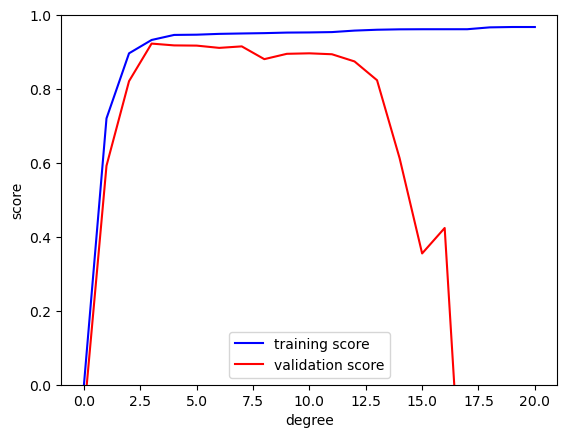

In [24]:
# validation curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)
plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1),
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

ValueError: X has 4 features, but PolynomialFeatures is expecting 1 features as input.

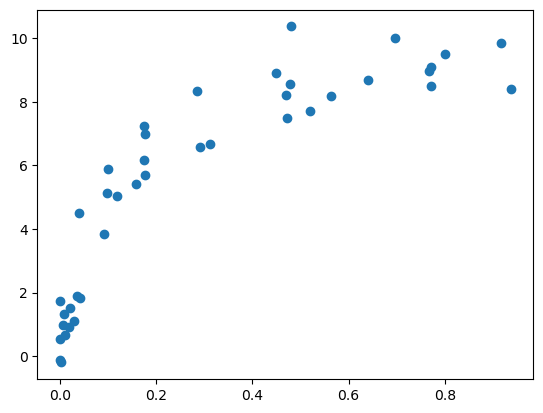

In [25]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

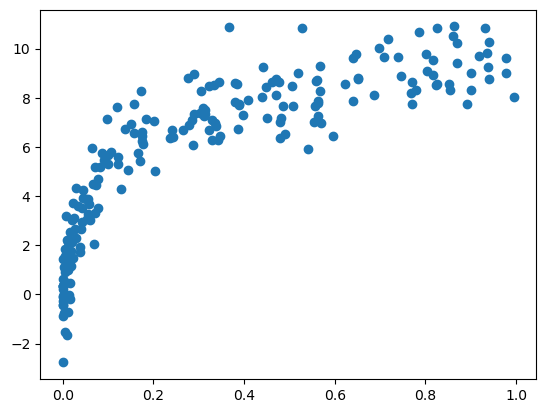

In [27]:
# Learning curve

X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)
plt.show()

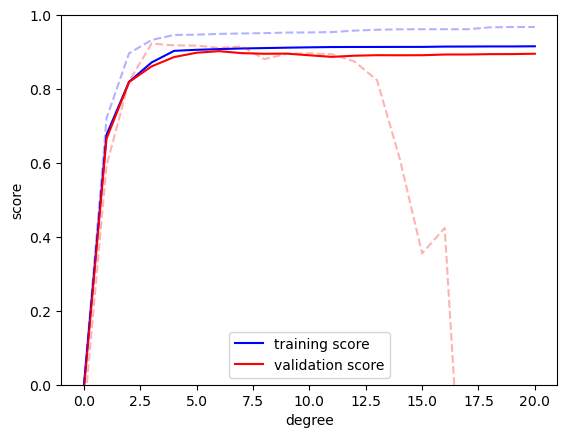

In [28]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)
plt.plot(degree, np.median(train_score2, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1),
         color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1),
         color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1),
         color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

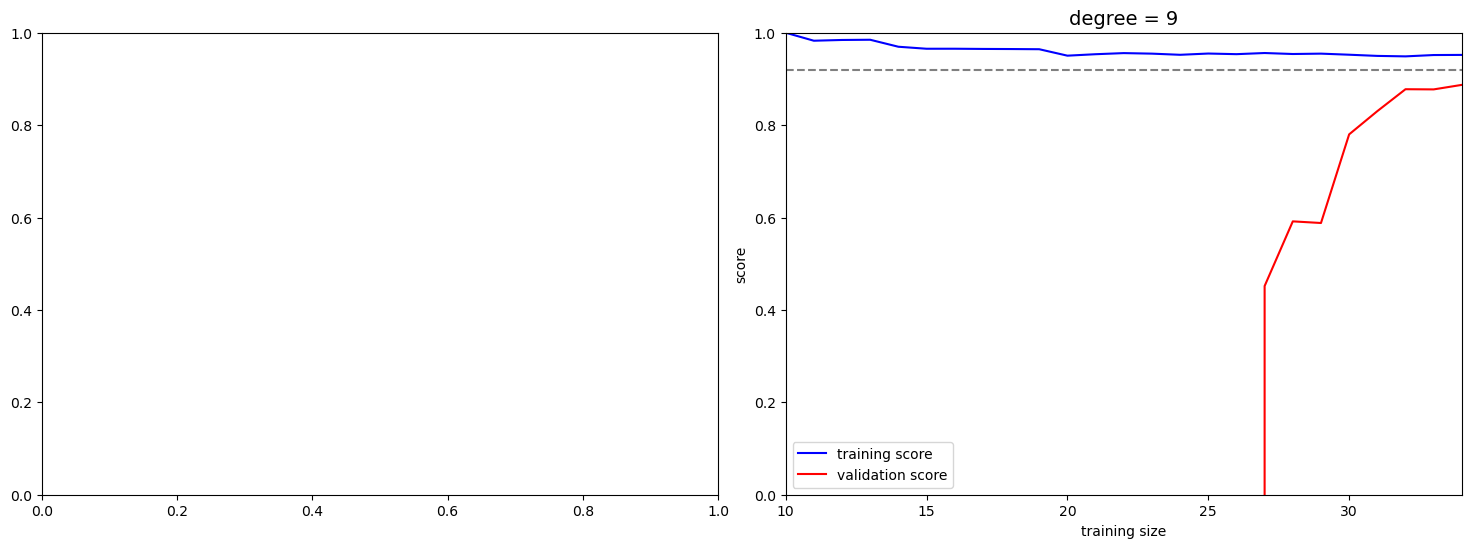

In [29]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree), X, y, cv=7,
        train_sizes=np.linspace(0.3, 1, 25))
ax[i].plot(N, np.mean(train_lc, 1),
           color='blue', label='training score')
ax[i].plot(N, np.mean(val_lc, 1),
           color='red', label='validation score')
ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
             N[-1], color='gray', linestyle='dashed')
ax[i].set_ylim(0, 1)
ax[i].set_xlim(N[0], N[-1])
ax[i].set_xlabel('training size')
ax[i].set_ylabel('score')
ax[i].set_title('degree = {0}'.format(degree), size=14)
ax[i].legend(loc='best')

### Grind Search

In [31]:
param_grid = {
    'polynomialfeatures__degree': np.arange(21),
    'linearregression__fit_intercept': [True, False]
}

grid = GridSearchCV(PolynomialRegression(), param_grid=param_grid, cv=7)

grid.fit(X, y)


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [36]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_index_)

0.8972710305736543
{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])
25


ValueError: X has 4 features, but PolynomialFeatures is expecting 1 features as input.

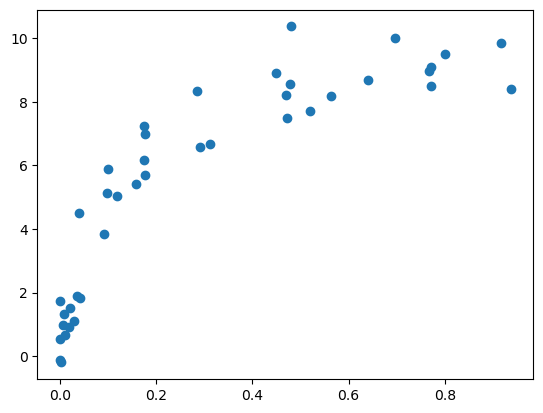

In [37]:
# use the best model for prediction...
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);